In [1]:
import numpy as np
import seaborn as sns

import sys
sys.path.append('../src')

from mdp import Mdp
import dynamic_programming as dp
import linear_programming as lp

In [3]:
# setting params
step_rwd = 0
targ_rwd = 1
noise = .3
gamma = .9
rewards = [step_rwd, targ_rwd]
size = 5
n_states = size ** 2
n_actions = 4
theta = 10e-6

# making env
env = Mdp(targ_rwd=targ_rwd, targ_loc = (0,0), sec_targ_loc = (4,4), step_rwd=step_rwd, noise=noise)
p = env.get_p()

# inferring policy and value func
V, pi = dp.value_iteration(theta, gamma, rewards, p, n_actions, n_states)
dp.print_policy(pi=pi)

+---+---+---+---+---+
| ↑ | ← | ← | ← | ← |
+---+---+---+---+---+
| ↑ | ↑ | ← | ← | ↓ |
+---+---+---+---+---+
| ↑ | ↑ | ↑ | ↓ | ↓ |
+---+---+---+---+---+
| ↑ | ↑ | → | ↓ | ↓ |
+---+---+---+---+---+
| ↑ | → | → | → | ↓ |
+---+---+---+---+---+


<Axes: >

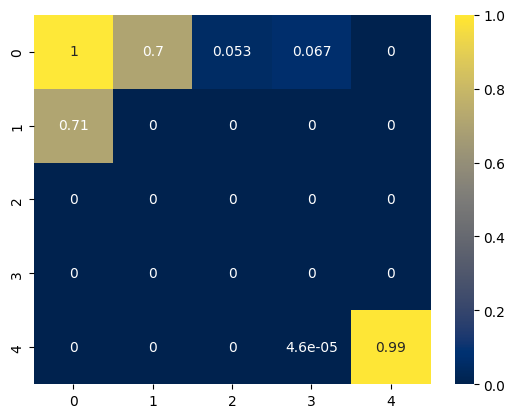

In [4]:
r_est = lp.infer_reward(transition_probs=p, policy=pi, gamma=gamma, _lambda=0)
sns.heatmap(r_est, annot=True, cmap="cividis")

<Axes: >

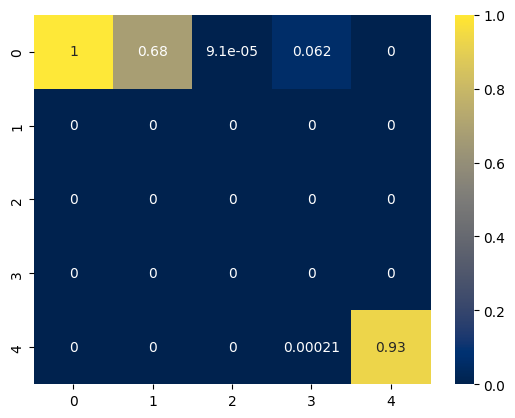

In [5]:
r_est = lp.infer_reward(transition_probs=p, policy=pi, gamma=gamma, _lambda=1.05)
sns.heatmap(r_est, annot=True, cmap="cividis")

<Axes: >

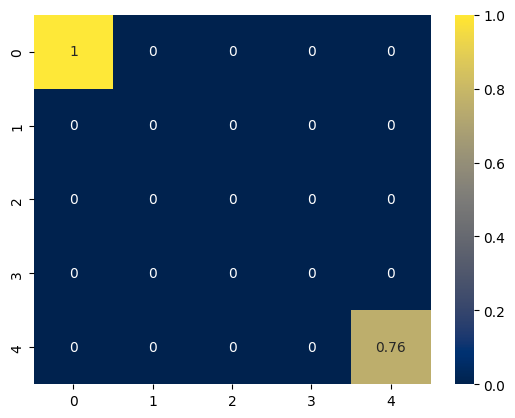

In [6]:
r_est = lp.infer_reward(transition_probs=p, policy=pi, gamma=gamma, _lambda=10.0)
sns.heatmap(r_est, annot=True, cmap="cividis")